In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import numpy as np
from numpy.linalg import norm 
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import block_reduce
from sklearn.preprocessing import normalize
from numpy.random import randn, rand, permutation

import helperFunctions as hf

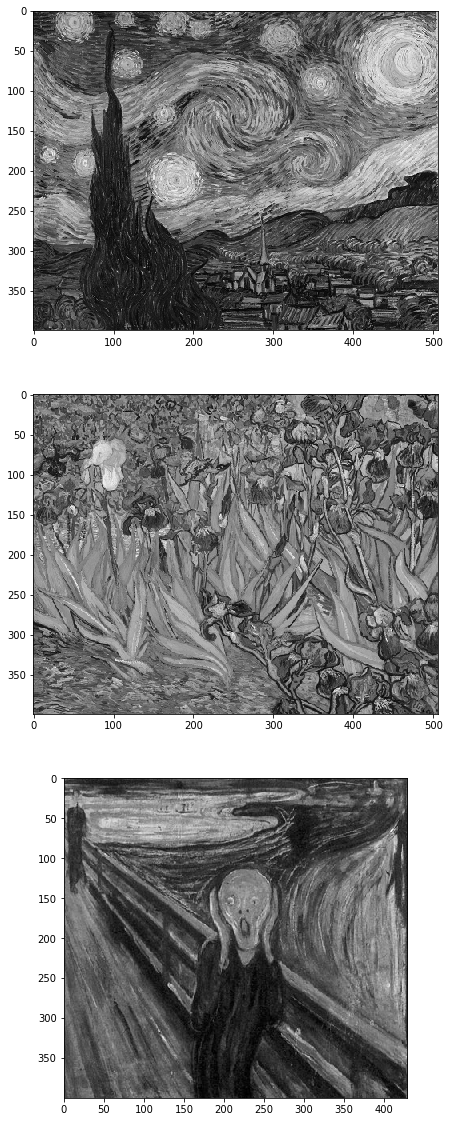

In [17]:
# # %% Load data
starryNight = imread('Images/starryNight.jpg', as_gray=True)
downScale, trim = 2, 3
night = block_reduce(starryNight, block_size=(downScale, downScale))[trim:-trim, trim:-trim]
H, W  = night.shape

irises = imread('Images/irises.jpg', as_gray=True)
downScale, trim = 2, 15
irises = block_reduce(irises, block_size=(downScale, downScale))[trim:-trim, trim:-trim]
irises = irises[-H:, :W]

scream = imread('Images/scream.jpg', as_gray=True)
downScale, trim = 1, 20
scream = block_reduce(scream, block_size=(downScale, downScale))[trim:-trim, trim:-trim]
scream = scream[-H:, :]

fig, axes = plt.subplots(3,1,figsize=(10,20))
plt.set_cmap('gray')
axes[0].imshow(night)
axes[1].imshow(irises)
axes[2].imshow(scream);

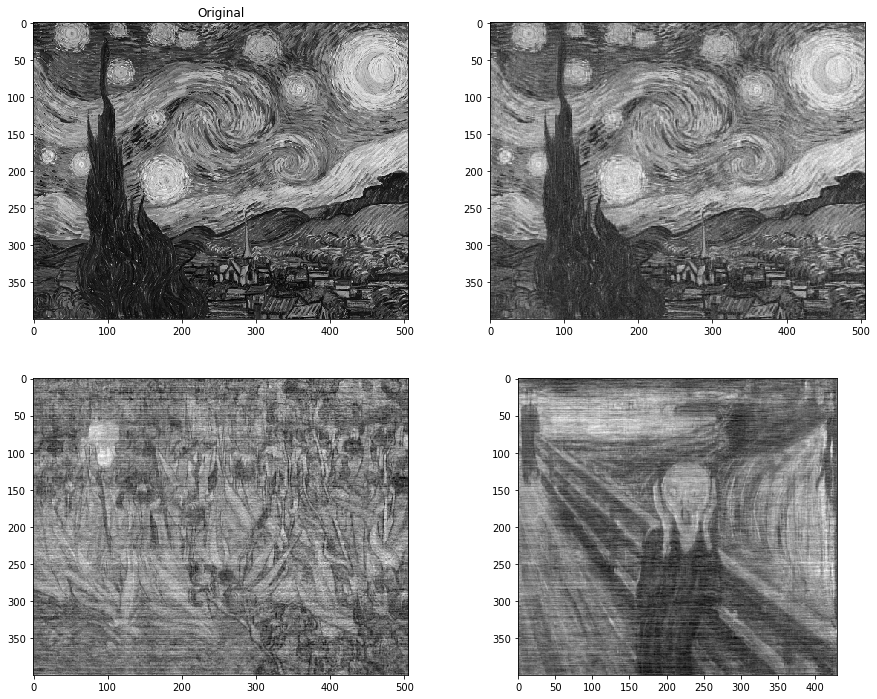

In [20]:
# Learn dictionary D from starry night
K, numAtoms = 5, 120
D, _ = hf.kSVD(night,numAtoms,K)

fig, axes = plt.subplots(2, 2, figsize=(15,12))
plt.set_cmap('gray')
axes[0][0].imshow(night)
axes[0][0].set_title('Original')
for ii, image in enumerate([night, irises, scream]):
    Xh = hf.OMP(D, image, 100)
    recovered = D @ Xh
    jj = ii+1
    axes[jj//2][jj%2].imshow(recovered)
#     axes[jj//2][jj%2].set_title("K = %d"%K);